## Mina Hany's Notebook

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, classification_report, accuracy_score
import matplotlib.pyplot as plt
from io import BytesIO
import base64

In [2]:
df = pd.read_csv('../../data/clean_Tweets.csv')
df.head()

,text,airline_sentiment
0,['said'],neutral
1,"['plus', 'added', 'commercial', 'experience', ...",positive
2,"['today', 'must', 'mean', 'need', 'take', 'ano...",neutral
3,"['really', 'aggressive', 'blast', 'obnoxious',...",negative
4,"['really', 'big', 'bad', 'thing']",negative


In [3]:
# 4️⃣ Feature extraction (TF-IDF)
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['text'].astype(str))
y = df['airline_sentiment']

In [4]:
# Creating train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Instantiate the LogisticRegression with required parameters
classifier = LogisticRegression(random_state=42, max_iter=1000, n_jobs=-1)

# Fit the model on the training data
classifier.fit(X_train, y_train)

# Predicting the labels for both training and test datasets
train_predictions = classifier.predict(X_train)
test_predictions = classifier.predict(X_test)

# Getting the probabilities for test data
test_probabilities = classifier.predict_proba(X_test)

In [5]:
# Evaluate the model on the training and test data
train_acc = accuracy_score(y_train, train_predictions)
test_acc = accuracy_score(y_test, test_predictions)

# Calculate precision, recall, and F1 score on the test data
weighted_precision = precision_score(y_test, test_predictions, average='weighted')
weighted_recall = recall_score(y_test, test_predictions, average='weighted')
weighted_f1 = f1_score(y_test, test_predictions, average='weighted')

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, test_predictions))


Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.93      0.87      1816
     neutral       0.65      0.46      0.54       612
    positive       0.79      0.62      0.70       458

    accuracy                           0.78      2886
   macro avg       0.75      0.67      0.70      2886
weighted avg       0.77      0.78      0.77      2886



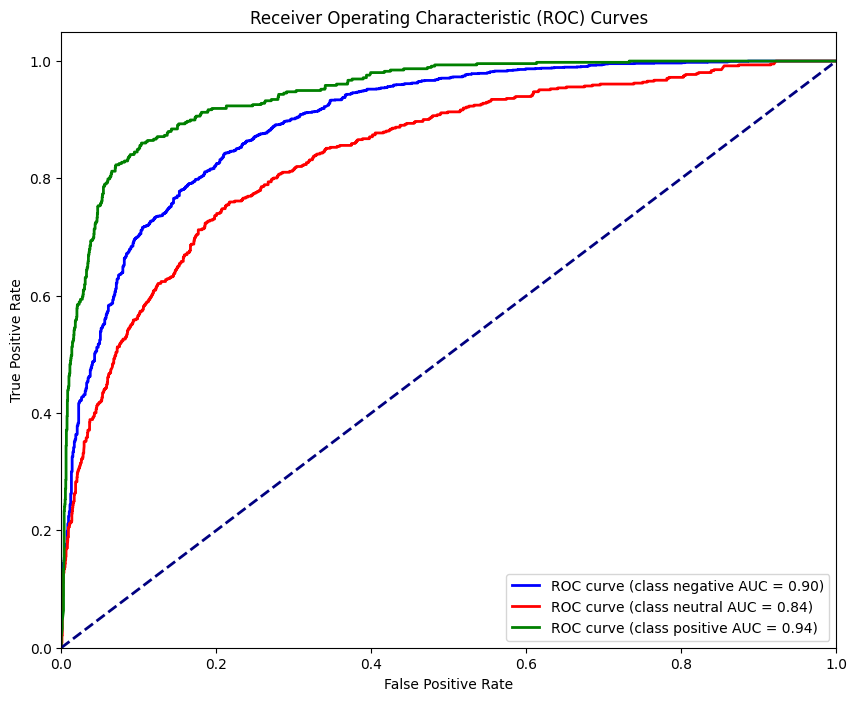

In [6]:
# ROC Curve and AUC (for multi-class, we use one-vs-rest approach)
plt.figure(figsize=(10, 8))
classes = np.unique(y)
n_classes = len(classes)
colors = ['blue', 'red', 'green']

# Binarize the output for ROC
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=classes)
# Use the trained LogisticRegression classifier instead of 'rf_classifier'
y_pred_proba = classifier.predict_proba(X_test) # Changed line

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'ROC curve (class {classes[i]} AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")

In [7]:
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Weighted Precision: {weighted_precision:.4f}")
print(f"Weighted Recall: {weighted_recall:.4f}")
print(f"Weighted F1 Score: {weighted_f1:.4f}")

Training Accuracy: 0.8620
Test Accuracy: 0.7838
Weighted Precision: 0.7737
Weighted Recall: 0.7838
Weighted F1 Score: 0.7709
